# Analisis exploratorio de datos (EDA)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import gofplots

## Create dataset

El objetivo de este analisis de datos es responder las siguientes preguntas respecto al dataset de Yellow Taxi 

- ¿Existe una manera de caracterizar los lugares más recurrentes para inicio/fin de viaje antes y despues de la pandemia?
- ¿Cómo son los viajes típicamente en distancia y tiempo? Cómo cambian con la llegada del covid?

Opcional: 

- ¿Podremos segmentar los viajes de alguna manera? (clusterización)
- ¿Se modifica la features de Congestion_Surcharge con la llegada del covid?

Para responder estas preguntas, utilizaremos los datos de los meses de Febrero y Marzo de los años 2019 y 2020. Debido al gran tamaño que tiene estos datasets, nos quedaremos con el 10% de los valores de cada uno de los meses. 

In [2]:
DATASET_PATH_02_2019 = '../data/yellow_tripdata_2020-02.parquet'
DATASET_PATH_03_2019 = '../data/yellow_tripdata_2020-03.parquet'
DATASET_PATH_02_2020 = '../data/yellow_tripdata_2020-02.parquet'
DATASET_PATH_03_2020 = '../data/yellow_tripdata_2020-03.parquet'


In [3]:
#Sample 10% of each month

dataset_paths = [DATASET_PATH_02_2019, DATASET_PATH_03_2019, DATASET_PATH_02_2020, DATASET_PATH_03_2020]
months_list = [2, 3, 2, 3] 
years_list = [2019, 2019, 2020, 2020]

# Sample and concatenate
final_sampled_data = pd.DataFrame()

for i, file_path in enumerate(dataset_paths):
    # Load the parquet file
    df =pd.read_parquet(file_path)

    df['month'] = months_list[i]
    df['year'] = years_list[i]

    # Sample 10% of the data
    sampled_data = df.sample(frac=0.1, random_state=42)  # Adjust random_state for reproducibility

    # Concatenate to the final sampled dataframe
    final_sampled_data = pd.concat([final_sampled_data, sampled_data], ignore_index=True)

# Save the final sampled data to a new parquet file
final_sampled_data.to_parquet('final_sampled_data.parquet', index=False)

In [3]:
FINAL_SAMPLE_DATA_PATH = '../data/final_sampled_data.parquet'

raw_df = pd.read_parquet(FINAL_SAMPLE_DATA_PATH)

raw_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,month,year
0,2,2020-02-19 19:37:08,2020-02-19 19:42:59,1.0,1.24,1.0,N,237,236,2,...,1.0,0.5,0.00,0.0,0.3,10.30,2.5,None,2,2019
1,2,2020-02-27 12:17:32,2020-02-27 12:26:00,1.0,0.86,1.0,N,237,237,2,...,0.0,0.5,0.00,0.0,0.3,10.30,2.5,None,2,2019
2,1,2020-02-06 14:38:29,2020-02-06 14:44:46,1.0,1.40,1.0,N,48,143,1,...,2.5,0.5,2.00,0.0,0.3,12.30,2.5,None,2,2019
3,1,2020-02-01 12:10:41,2020-02-01 12:22:25,1.0,1.80,1.0,N,142,140,1,...,2.5,0.5,2.56,0.0,0.3,15.36,2.5,None,2,2019
4,2,2020-02-14 19:18:29,2020-02-14 19:37:45,3.0,1.85,1.0,N,246,137,1,...,1.0,0.5,3.36,0.0,0.3,20.16,2.5,None,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861407,2,2020-03-24 12:49:30,2020-03-24 12:54:39,1.0,1.70,1.0,N,90,48,1,...,0.0,0.5,2.06,0.0,0.3,12.36,2.5,None,3,2020
1861408,2,2020-03-16 06:13:47,2020-03-16 06:19:36,1.0,1.31,1.0,N,162,137,1,...,0.0,0.5,1.96,0.0,0.3,11.76,2.5,None,3,2020
1861409,2,2020-03-04 13:06:20,2020-03-04 13:15:57,6.0,1.35,1.0,N,234,114,1,...,0.0,0.5,2.26,0.0,0.3,13.56,2.5,None,3,2020
1861410,1,2020-03-17 09:14:16,2020-03-17 09:17:39,1.0,0.70,1.0,N,170,137,1,...,2.5,0.5,1.55,0.0,0.3,9.35,2.5,None,3,2020


Visualizamos los primeros datos

Column wiki: 

- VendorID: taxi provider

- tpep_pickup_datetime: pick up time

- tpep_dropoff_datetime: drop off time

- passenger_count: number of passengers

- trip_distance: in miles

- RatecodeID: category of rate price

- store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server

- PULocationID: pick up zone

- DOLocationID: Drop Off zone

- payment_type: categorical type

- fare_amount: The time-and-distance fare calculated by the meter

- extra: Miscellaneous extras and surcharges. Currently, this only includes
the $0.50 and $1 rush hour and overnight charges

- mta_tax: $0.50 MTA tax that is automatically triggered based on the metered
rate in use

- Improvement_surcharge: $0.30 improvement surcharge assessed trips at the flag drop. The
improvement surcharge began being levied in 2015

- Tip_amount: Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.

- Tolls_amount: Total amount of all tolls paid in trip. 

- Total_amount: total price

- Congestion_Surcharge: Total amount collected in trip for NYS congestion surcharge

- airport_fee: $1.25 for pick up only at LaGuardia and John F. Kennedy Airports

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861412 entries, 0 to 1861411
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [6]:
raw_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year
count,1.861412e+06,1861412,1861412,1.844050e+06,1.861412e+06,1.844050e+06,1.861412e+06,1.861412e+06,1.861412e+06,1.861412e+06,1.861412e+06,1.861412e+06,1.861412e+06,1.861412e+06,1.861412e+06,1.861412e+06,1.844050e+06,1.861412e+06,1861412.0
mean,1.674079e+00,2020-02-22 22:21:27.250147,2020-02-22 22:37:23.046178,1.491966e+00,2.855675e+00,1.054884e+00,1.643207e+02,1.619792e+02,1.249931e+00,1.331210e+01,1.097423e+00,4.923660e-01,2.196659e+00,3.213577e-01,2.977775e-01,1.924382e+01,2.293537e+00,2.323162e+00,2019.5
min,1.000000e+00,2008-12-31 23:03:42,2008-12-31 23:19:27,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.000000e+02,-4.500000e+00,-5.000000e-01,-5.500000e+01,-2.150000e+01,-3.000000e-01,-4.003000e+02,-2.500000e+00,2.000000e+00,2019.0
25%,1.000000e+00,2020-02-11 19:41:25,2020-02-11 19:54:33,1.000000e+00,9.700000e-01,1.000000e+00,1.250000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,2.000000e+00,2019.0
50%,2.000000e+00,2020-02-22 17:51:35.500000,2020-02-22 18:06:21,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.960000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,2.000000e+00,2019.5
75%,2.000000e+00,2020-03-04 12:52:53,2020-03-04 13:09:10,2.000000e+00,2.950000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.930000e+00,0.000000e+00,3.000000e-01,2.013000e+01,2.500000e+00,3.000000e+00,2020.0
max,6.000000e+00,2020-07-11 12:51:24,2020-07-11 12:54:27,9.000000e+00,3.699400e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,1.024000e+01,5.000000e-01,4.300000e+02,1.261200e+02,3.000000e-01,6.711032e+05,2.750000e+00,3.000000e+00,2020.0
std,4.701510e-01,NaN,NaN,1.137194e+00,3.709301e+00,7.139713e-01,6.585579e+01,7.010250e+01,4.846187e-01,6.957202e+02,1.249790e+00,7.360851e-02,2.683424e+00,1.559987e+00,3.568130e-02,6.957646e+02,7.120615e-01,4.676842e-01,0.5


In [6]:
#Agregamos un nuevo feature llamado "trip duration"
raw_df['trip_duration'] = (raw_df['tpep_dropoff_datetime'] - raw_df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [9]:
raw_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,month,year,trip_duration
0,2,2020-02-19 19:37:08,2020-02-19 19:42:59,1.0,1.24,1.0,N,237,236,2,...,0.5,0.00,0.0,0.3,10.30,2.5,None,2,2019,5.850000
1,2,2020-02-27 12:17:32,2020-02-27 12:26:00,1.0,0.86,1.0,N,237,237,2,...,0.5,0.00,0.0,0.3,10.30,2.5,None,2,2019,8.466667
2,1,2020-02-06 14:38:29,2020-02-06 14:44:46,1.0,1.40,1.0,N,48,143,1,...,0.5,2.00,0.0,0.3,12.30,2.5,None,2,2019,6.283333
3,1,2020-02-01 12:10:41,2020-02-01 12:22:25,1.0,1.80,1.0,N,142,140,1,...,0.5,2.56,0.0,0.3,15.36,2.5,None,2,2019,11.733333
4,2,2020-02-14 19:18:29,2020-02-14 19:37:45,3.0,1.85,1.0,N,246,137,1,...,0.5,3.36,0.0,0.3,20.16,2.5,None,2,2019,19.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861407,2,2020-03-24 12:49:30,2020-03-24 12:54:39,1.0,1.70,1.0,N,90,48,1,...,0.5,2.06,0.0,0.3,12.36,2.5,None,3,2020,5.150000
1861408,2,2020-03-16 06:13:47,2020-03-16 06:19:36,1.0,1.31,1.0,N,162,137,1,...,0.5,1.96,0.0,0.3,11.76,2.5,None,3,2020,5.816667
1861409,2,2020-03-04 13:06:20,2020-03-04 13:15:57,6.0,1.35,1.0,N,234,114,1,...,0.5,2.26,0.0,0.3,13.56,2.5,None,3,2020,9.616667
1861410,1,2020-03-17 09:14:16,2020-03-17 09:17:39,1.0,0.70,1.0,N,170,137,1,...,0.5,1.55,0.0,0.3,9.35,2.5,None,3,2020,3.383333


In [4]:
## asumptions

NUMERICAL_FEATURES = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',  'total_amount', 'congestion_surcharge', 'trip_duration']
NUMERICAL_CONTINOUS = ['trip_distance', 'trip_duration', 'fare_amount', 'tip_amount', 'total_amount']
NUMERICAL_DISCRETE = ['passenger_count', 'congestion_surcharge']
CATEGORY_FEATURES = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'airport_fee']
TIME_FEATURES = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']

TARGET = "..."

## Estadísticas descriptivas de variables numéricas

In [7]:
num_df = raw_df[NUMERICAL_FEATURES]

In [8]:
num_df.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1.0,1.24,6.0,1.0,0.5,0.00,0.0,0.3,10.30,2.5,5.850000
1,1.0,0.86,7.0,0.0,0.5,0.00,0.0,0.3,10.30,2.5,8.466667
2,1.0,1.40,7.0,2.5,0.5,2.00,0.0,0.3,12.30,2.5,6.283333
3,1.0,1.80,9.5,2.5,0.5,2.56,0.0,0.3,15.36,2.5,11.733333
4,3.0,1.85,12.5,1.0,0.5,3.36,0.0,0.3,20.16,2.5,19.266667


In [9]:
# Calculate stats: 

# Mean:

print("### Mean: ")
print(num_df.mean())
print('\n')

# STD:

print("### Standard deviation: ")
print(num_df.std())
print('\n')

### Mean: 
passenger_count           1.491966
trip_distance             2.855675
fare_amount              13.312096
extra                     1.097423
mta_tax                   0.492366
tip_amount                2.196659
tolls_amount              0.321358
improvement_surcharge     0.297777
total_amount             19.243821
congestion_surcharge      2.293537
trip_duration            15.929934
dtype: float64


### Standard deviation: 
passenger_count            1.137194
trip_distance              3.709301
fare_amount              695.720236
extra                      1.249790
mta_tax                    0.073609
tip_amount                 2.683424
tolls_amount               1.559987
improvement_surcharge      0.035681
total_amount             695.764628
congestion_surcharge       0.712062
trip_duration             61.055296
dtype: float64




In [11]:
#Make a sample to make plots
sampled_num_df = num_df.sample(n = 3000, random_state=42)

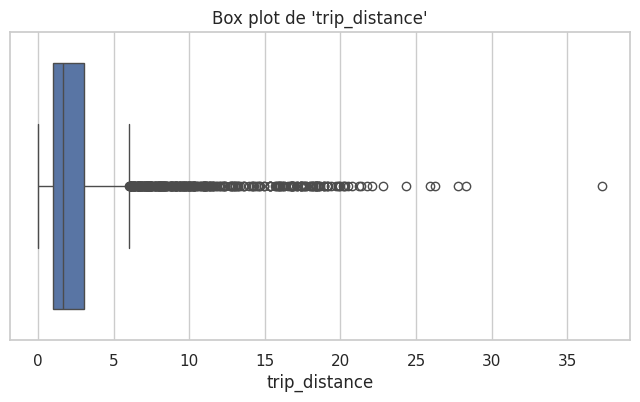

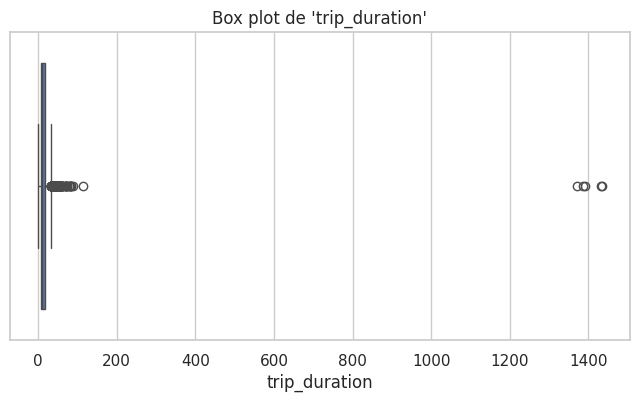

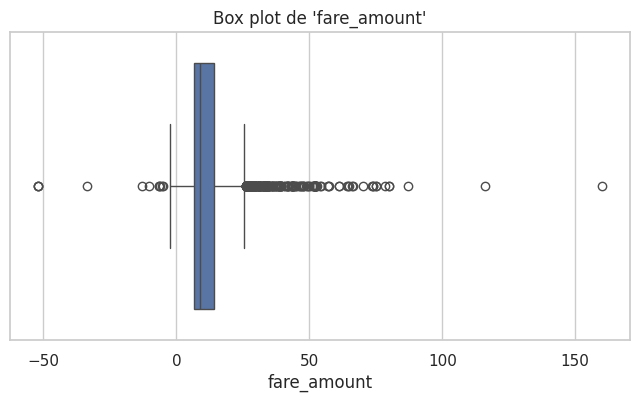

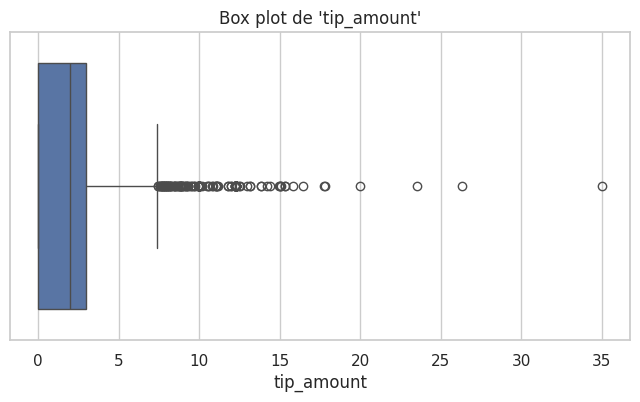

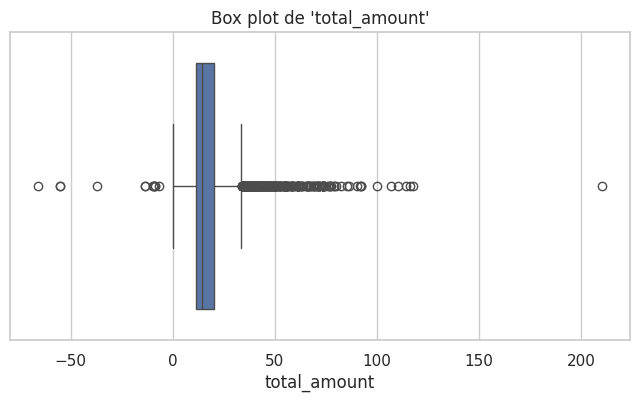

In [23]:
#Me quedo solo con valores no discretos

for column in sampled_num_df[NUMERICAL_CONTINOUS].columns:
    plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico según necesidad
    sns.boxplot(x=sampled_num_df[column])
    plt.title(f"Box plot de '{column}'")
    plt.show()

- passenger_count, es discreta, hay que hacer un grafico de barras
- trip_distance: al hacer el boxplot se ven muchos outliers. Revisar que pasa ahi.
- trip_amount: se observa un claro grupo de outliers en la duracion del viaje, con tiempos superiores alos 1300 minutos. 
- fare_amount: tiene valores negativos. Siendo que es la tarifa en relacion al tiempo y distancia no tiene sentido que sea negativa.
- extra: Tiene valores negativos. Al representar cargos adicionales y recargos varios no tiene sentido que tome valores negativos. (Puede ser que sean descuentos por algun motivo?)
- mta_tax: Representa el Metropolitan commuter transportation mobility tax. Toma valores negativos y outliers llamativos ($39) siendo que deberia ser de $0.50. No creo que aporte mucha informacion ya que pareciera ser un valor fijo que siempre se aplica.
- tolls_amount: Representa el monto total de peajes pagados en el viaje. al hacer un describe() se ve que el valor minimo es negativo. No tiene sentido. Tiene algunos outliers
- improvement_surcharge: es un cargo aplicado en la bajada de bandera. Tiene algun que otro valor negativo. Los demas estan entre 0 y 0.3
- total_amount: tiene algunos outliers negativos. y algunos outliers positivos interesantes.
- congestion_surcharge: Existen algunos valores negativos

<Figure size 800x400 with 0 Axes>

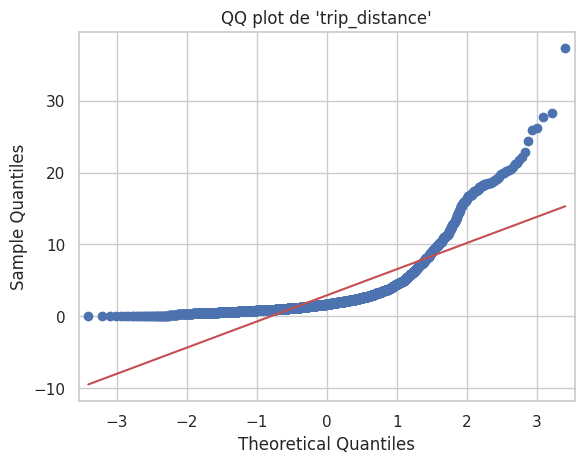

<Figure size 800x400 with 0 Axes>

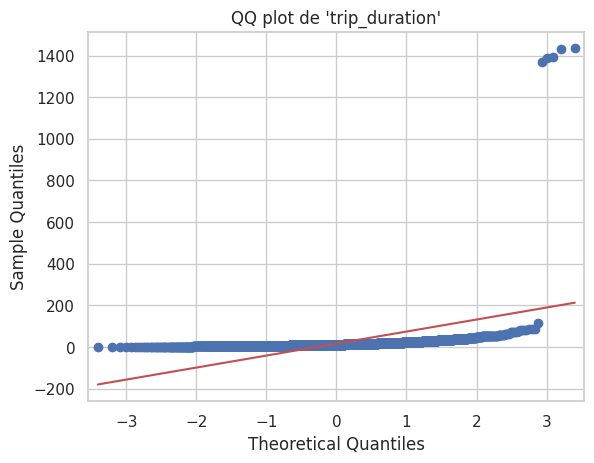

<Figure size 800x400 with 0 Axes>

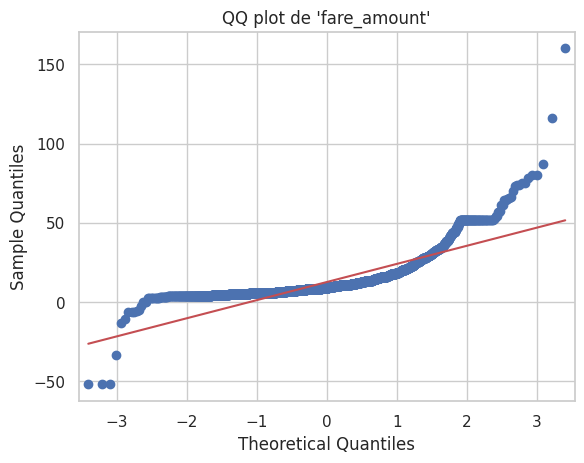

<Figure size 800x400 with 0 Axes>

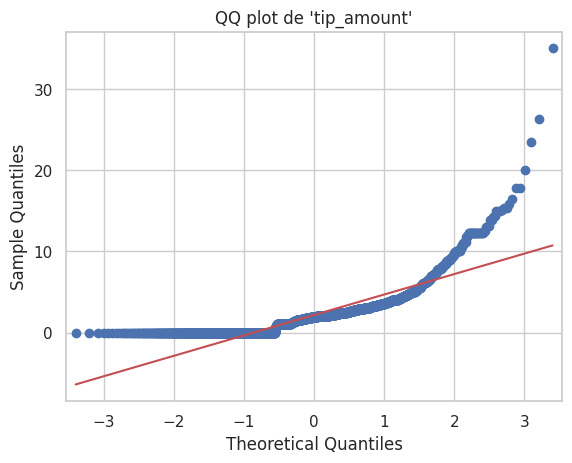

<Figure size 800x400 with 0 Axes>

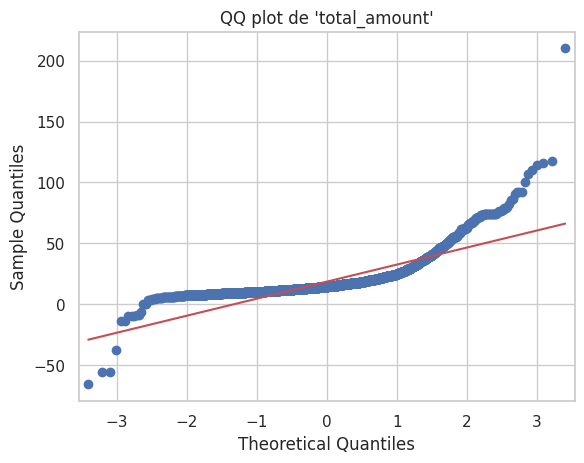

In [26]:
for column in sampled_num_df[NUMERICAL_CONTINOUS].columns:
    plt.figure(figsize=(8, 4))
    
    # Create a QQ plot
    gofplots.qqplot(sampled_num_df[column], line='s')  # 's' adds a standardized line
    
    plt.title(f"QQ plot de '{column}'")
    plt.show()

In [14]:
### Calculate skewness

sampled_num_df[NUMERICAL_FEATURES].skew()

passenger_count           2.597700
trip_distance             3.159053
fare_amount               2.946551
extra                     0.763220
mta_tax                  -9.874934
tip_amount                3.190244
tolls_amount              5.593502
improvement_surcharge   -14.511313
total_amount              3.090423
congestion_surcharge     -3.464322
trip_duration            23.172083
dtype: float64

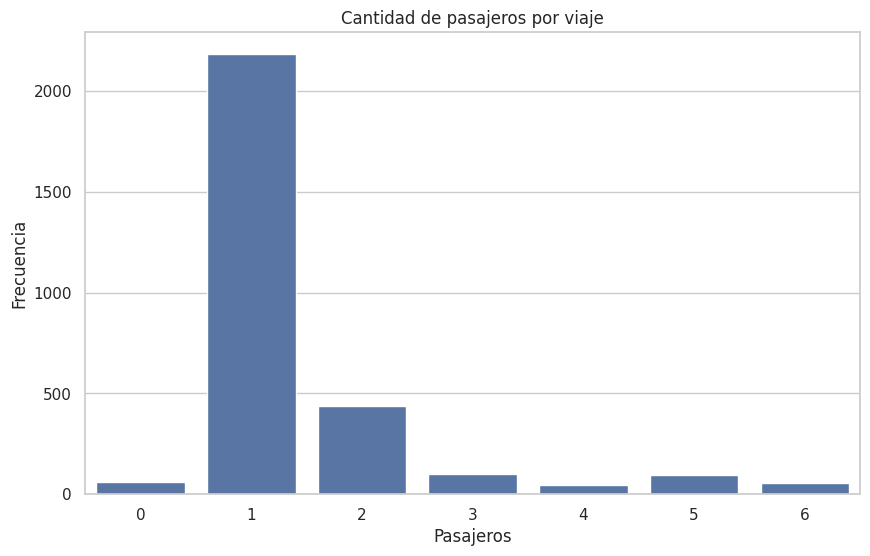

In [24]:
# Conteo de los valores en la columna
conteo_valores = sampled_num_df.passenger_count.value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_valores.index.astype(int), y=conteo_valores.values)

plt.title('Cantidad de pasajeros por viaje')
plt.xlabel('Pasajeros')
plt.ylabel('Frecuencia')

plt.show()

## Estadísticas descriptivas de variables categóricas

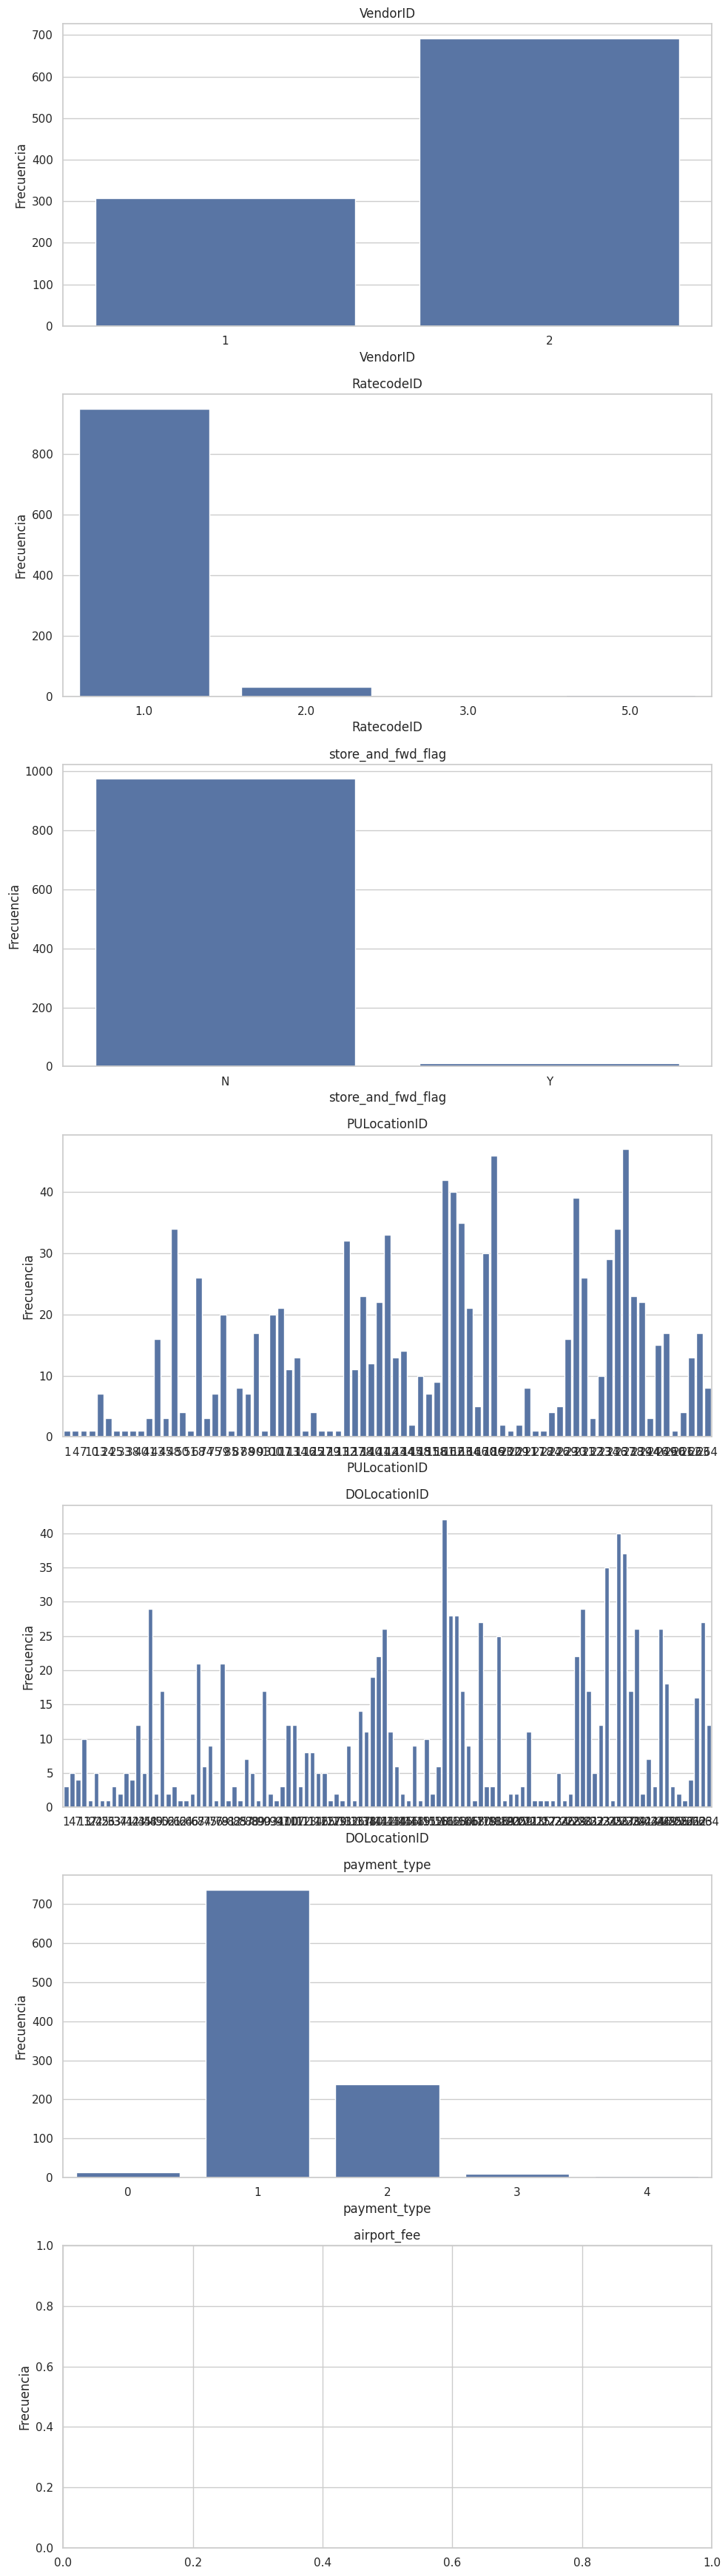

In [ ]:
sampled_cat_df = raw_df[CATEGORY_FEATURES].sample(n=1000, random_state=42)

# Número de columnas
num_columns = len(sampled_cat_df.columns)

# Crear una figura con varios subgráficos
fig, axs = plt.subplots(num_columns, figsize=(10, 5 * num_columns)) 

for i, column in enumerate(sampled_cat_df.columns):
    # Conteo de los valores en cada columna
    conteo_valores = sampled_cat_df[column].value_counts()

    # Creando el gráfico de barras para cada columna
    sns.barplot(x=conteo_valores.index, y=conteo_valores.values, ax=axs[i])

    # Añadiendo títulos y etiquetas a cada subgráfico
    axs[i].set_title(column)
    axs[i].set_ylabel('Frecuencia')

# Ajustando el layout para evitar la superposición
plt.tight_layout()

# Mostrando el gráfico
plt.show()

## Correlaciones

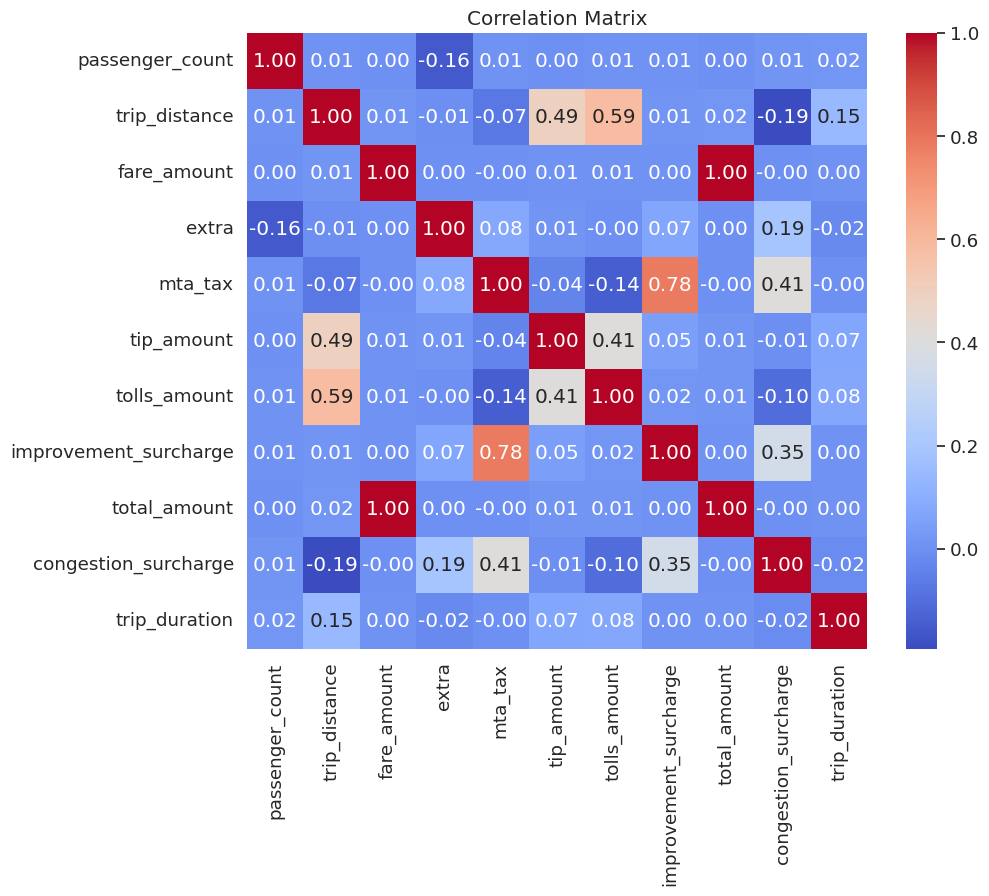

In [32]:
# CORRELATION MATRIX: 


corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust font size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Set the title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

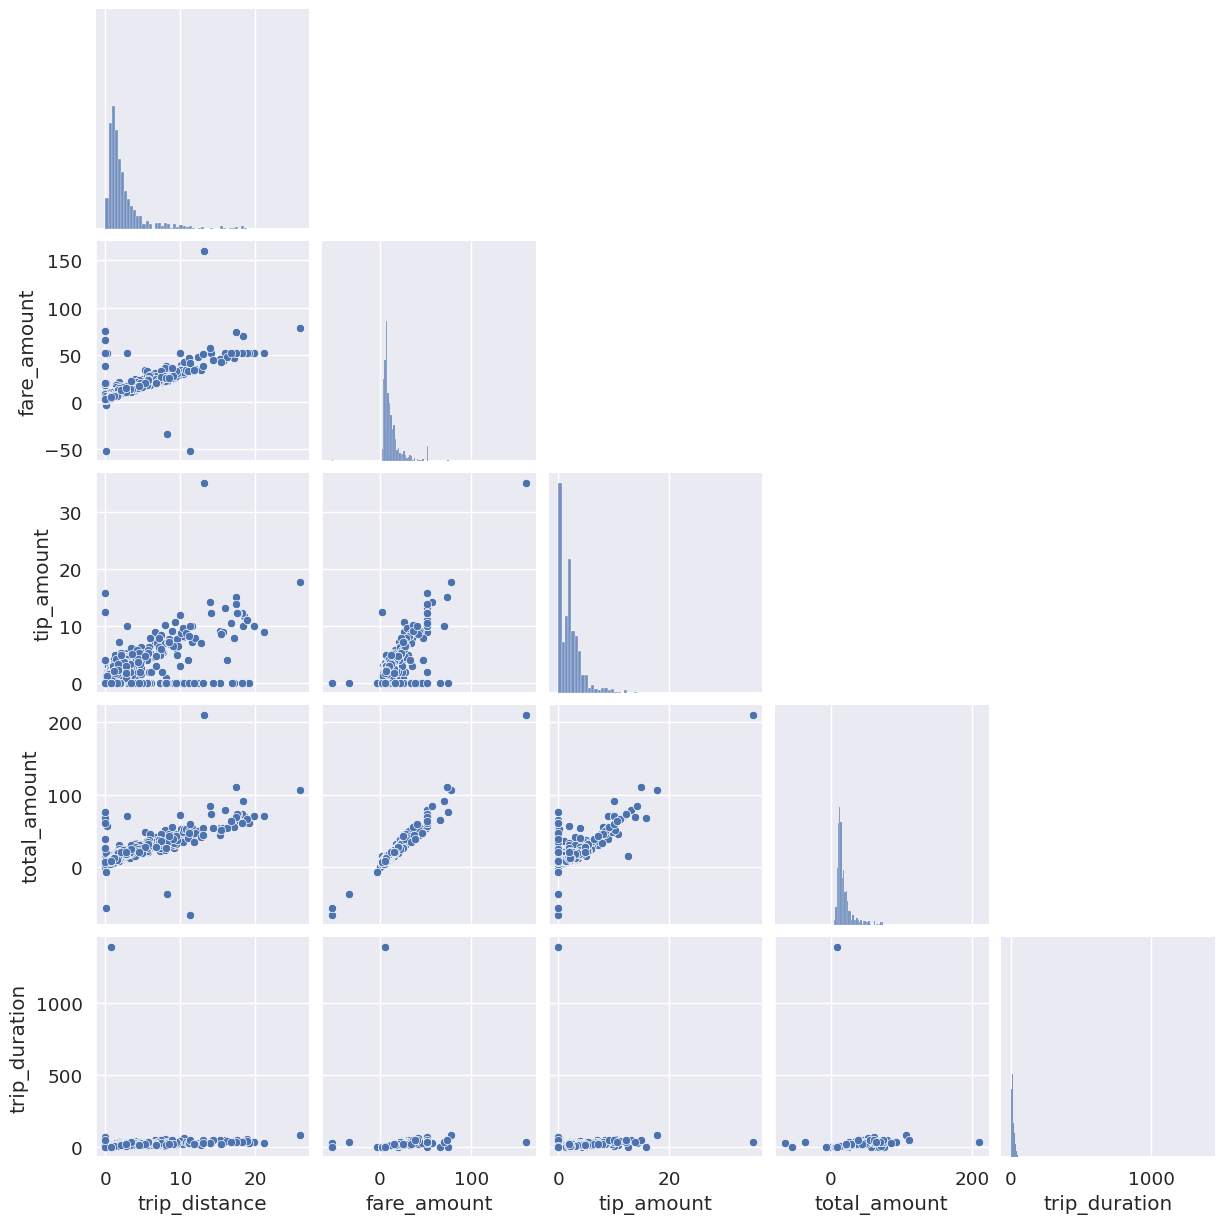

In [33]:
# Make a sample from the df to make pair plot

sampled_num_df = num_df.sample(n = 1000, random_state=42)

sns.pairplot(data=sampled_num_df[['trip_distance', 'fare_amount', 'tip_amount','total_amount', 'trip_duration']], corner=True)

/home/octadesh/POSTGRADO_IA/analisis_datos/CEIA_Analisis_de_datos/.venv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


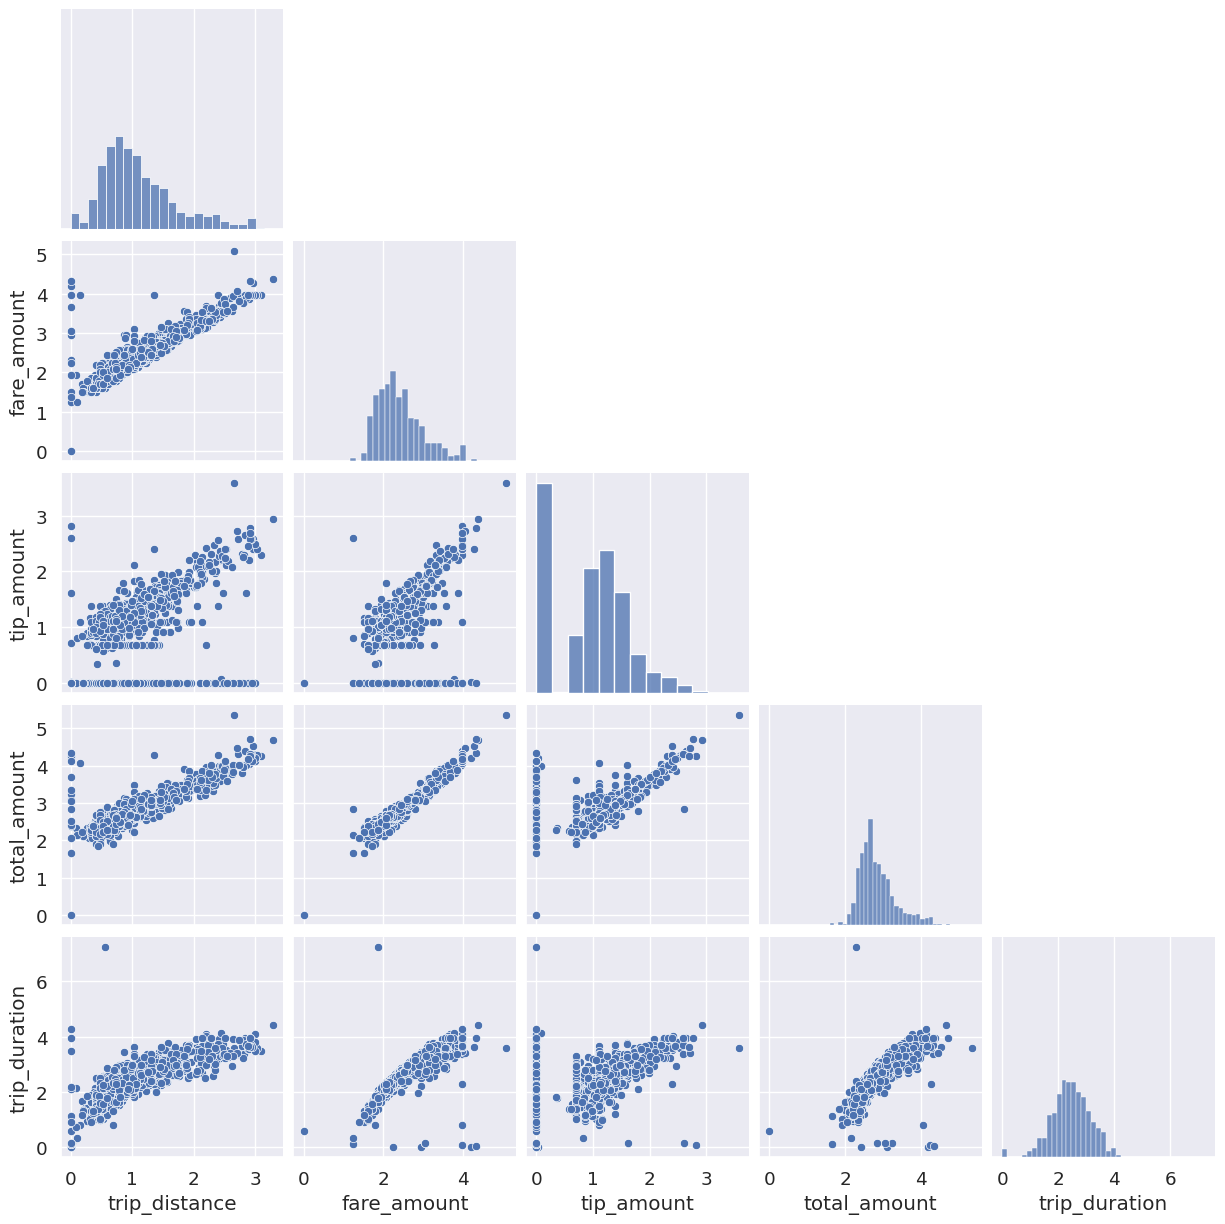

In [39]:
# Dado que hay valores con magnitud muy distinta (outliers) aplicamos escala logaritmica antes de graficar

import seaborn as sns
import numpy as np
import pandas as pd

# Assuming 'num_df' is your DataFrame

# Select columns for pair plot
columns_for_pairplot = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']

# Make a sample from the df to make a pair plot
sampled_num_df = num_df.sample(n=1000, random_state=42)

# Logarithmic transformation of the selected columns
sampled_num_df_log = sampled_num_df.copy()
sampled_num_df_log[columns_for_pairplot] = np.log1p(sampled_num_df_log[columns_for_pairplot])

# Create a pair plot with logarithmic scale
sns.pairplot(data=sampled_num_df_log[columns_for_pairplot], corner=True)

# Show the plot
plt.show()


## Missing values

In [34]:
missing_values = raw_df.isnull().sum()
missing_values

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            17362
trip_distance                  0
RatecodeID                 17362
store_and_fwd_flag         17362
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       17362
airport_fee              1861412
month                          0
year                           0
trip_duration                  0
dtype: int64

In [35]:
# Count missing values for each column
missing_percentage = (raw_df.isnull().sum() / len(raw_df) * 100)

missing_percentage[missing_percentage > 0]

passenger_count           0.932733
RatecodeID                0.932733
store_and_fwd_flag        0.932733
congestion_surcharge      0.932733
airport_fee             100.000000
dtype: float64

In [36]:
raw_df['airport_fee'].unique()

array([None], dtype=object)

In [37]:
# Specify columns of interest
columns_to_check = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge']

# Create a boolean mask for rows where all specified columns are null
rows_with_nulls = raw_df[columns_to_check].isnull().all(axis=1)

# Filter the DataFrame to show only rows where all specified columns are null
result_df = raw_df[rows_with_nulls]

print( 'passenger_count, RatecodeID, store_and_fwd_flag and congestion_surcharge are null simultaniusly: ', result_df.shape[0] == missing_values.loc['passenger_count'])

passenger_count, RatecodeID, store_and_fwd_flag and congestion_surcharge are null simultaniusly:  True


## Conclusiones

- Missing values y outliers: 

    - Airport fee: tiene todos valores nulos, aparenta haber sido deprecado y por ello podemos remover la columna

    - fare_amount: 
        - Tiene valores negativos y siendo que es la tarifa en relacion al tiempo y distancia no tiene sentido que sea negativa. (20k) Tambien se encontro que en dichas filas todos los valores relacionados al precio son negativos, por lo que se podria tratar de errores en la carga de los datos. 
        - hay algunos casos extraños o outliers, donde para distancias cortas tenemos fare_ammounts altos. Habría que analizarlos y entender a que se deben
        - Otra observacion interesante que se puede hacer, es que a partir de cierta distancia, el precio de fare ammount no sube, por lo que podria haber un techo en el precio. (Este techo no aparece en total amount)


    - passenger_count, RatecodeID, store_and_fwd_flag and congestion_surcharge tienen el mismo numero de missing values, representan solo 0.77% del total y son nulos siempre de forma simultanea. Dado que se perderian muy pocas filas del dataset total, se podrian dropear. Ademas estos valores no afectan a la variable que queremos responder (tiempo y distancia de los viajes)

- Correlaciones: 

    - Alta correlacion entre fare_amount y total_amount (total incluye a fare)
    
    - Fare amount y total amount aparentan estar correlacionadas en el grafico con la distancia, pero en el calculo da 0.08. A que se puede deber esto? A la no linealidad que aparece con ese "techo" al precio?

    - Se observa tambien cierta correlacion de tip_amount con total_amount y trip_distance, pero tiene valores en cero para todo el rango de distancias. Esto tiene sentido ya que el tip no depende solo de si un viaje fue largo o no. 

    - Observando las graficas, parecia que algunas variables no estaban correlacionadas en casos donde si deberian estarlo, por ejemplo trip_distance con trip_duration. Esto se debía a la presencia de valores muy grandes (outliers) que no permitían observar la correlacion graficamente por un tema de escala.  Para esto aplicamos escala logaritmica y efectivamente comenzamos a ver la correlación. 

Otros resultados: 

- passenger_count, es discreta, hay que hacer un grafico de barras

- trip_distance: al hacer el boxplot se ven muchos outliers. Revisar que pasa ahi.

- extra: Tiene valores negativos. Al representar cargos adicionales y recargos varios no tiene sentido que tome valores negativos. (Puede ser que sean descuentos por algun motivo?)

- mta_tax: Representa el Metropolitan commuter transportation mobility tax. Toma valores negativos y outliers llamativos ($39) siendo que deberia ser de $0.50. No creo que aporte mucha informacion ya que pareciera ser un valor fijo que siempre se aplica.

- tolls_amount: Representa el monto total de peajes pagados en el viaje. al hacer un describe() se ve que el valor minimo es negativo. No tiene sentido. Tiene algunos outliers

- improvement_surcharge: es un cargo aplicado en la bajada de bandera. Tiene algun que otro valor negativo. Los demas estan entre 0 y 0.3

- total_amount: tiene algunos outliers negativos. y algunos outliers positivos interesantes.

- congestion_surcharge: Existen algunos valores negativos